**Инструкция по запуску:** 
1. Установить библиотеки transliterate, numpy, pandas, matplotlib  
2. Ввести данные в блоке "Ввод данных"  
3. Последовательно запустить все блоки программы

# Аннотация

### Цель.
Цели: провести парсинг и первичный анализ данных рынка продажи недвижимости.

### Задачи.
1. Разработать парсер датасета с сайта ЦИАН (минимальный набор факторов: широта и долгота расположения дома, общая площадь, количество комнат, материал стен, этаж квартиры и этажность здания, адрес, округ, тип продажи);  
2. Провести обработку пропусков и поиск аномалий;  
3. Первичный анализ факторов, фича-инжиниринг исходя из бизнес логики;  
4. Провести вывод объявлений в .xlsx документ со стоимостью ниже выборочного среднего значения похожих объявлений. 


### Данные.
Данные третьего транспортного кольца Москвы с сайта ЦИАН


### Проблемы.
Наличие фейков

# Парсинг датасета

Признаки, получаемые в ходе сбора данных с предложений по долгосрочной аренде недвижимости:  
**district** - район  
**underground** - метро  
**street** - улица  
**floor** - этаж  
**floors_count** - общее количество этажей  
**total_meters** - общая площадь  
**living_meters** - жилая площади  
**kitchen_meters** - площадь кухни  
**rooms_count** - количество комнат  
**year_construction** - год постройки здания  
**price_per_month** - стоимость в месяц  
**price_per_m2** - стоимость на квадратный метр  
**commissions** - комиссия, взымаемая при заселении  
**author** - автор объявления  
**author_type** - тип автора  
**phone** - номер телефона в объявлении  
**link** - ссылка на объявление.  

Возможные значения поля author_type:  
**real_estate_agent** - агентство недвижимости  
**homeowner** - собственник  
**realtor** - риелтор  
**official_representative** - ук оф.представитель  
**representative_developer** - представитель застройщика  
**developer** - застройщик  
**unknown** - без указанного типа  
Признаки, получаемые в ходе сбора данных с предложений по продаже недвижимости  
Признаки аналогичны вышеописанным, кроме отсутствия полей price_per_month и commissions.  

При этом появляются новые:  
**price** - стоимость недвижимости  
**residential_complex** - название жилого комплекса  

In [1]:
#Импорт необходимых библиотек
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import transliterate #необходим для модуля cianparser
import cianparser
from sklearn.preprocessing import StandardScaler

In [2]:
#Парсинг ЦИАНа в файл
data = cianparser.parse(
    deal_type="rent_long",
    accommodation_type="flat",
    location="Москва",
    rooms=(2, 3),
    start_page=1,
    end_page=2,
    is_saving_csv=True,
    is_latin=False,
    is_express_mode=False,
    is_by_homeowner=False,
)


                              Preparing to collect information from pages..
The absolute path to the file: 
C:\Users\Mr. Manager\Python\MVP прогноза стоимости недвижимости\cian_parsing_result_rent_long_1_2_moskva_23_Apr_2023_17_15_37_245952.csv 

https://cian.ru/cat.php?engine_version=2&p=1&region=1&offer_type=flat&deal_type=rent&room2=1&room3=1&with_neighbors=0&type=4
[<div class="_93444fe79c--wrapper--C1mw7 _93444fe79c--wrapper_redesign--dDzY3" data-name="HeaderDefault"><div data-name="Breadcrumbs" itemscope="" itemtype="http://schema.org/BreadcrumbList"><div class="_93444fe79c--breadcrumbs--KqVG7"><span itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem"><a class="_93444fe79c--breadcrumbs-link--JAzZV" href="https://www.cian.ru/" itemprop="item" title="Недвижимость в Москве"><span itemprop="name">Недвижимость в Москве</span><meta content="1" itemprop="position"/><div class="_93444fe79c--breadcrumbs-delimiter--CcXCV"></div></a></span><span itemprop="itemList

KeyboardInterrupt: 

In [3]:
data = cianparser.parse(
    deal_type="rent_long",
    accommodation_type="flat",
    location="Москва",
    rooms=(2, 3),
    start_page=1,
    end_page=2,
    is_saving_csv=True,
    is_latin=False,
    is_express_mode=False,
    is_by_homeowner=False,
)


                              Preparing to collect information from pages..
The absolute path to the file: 
C:\Users\Mr. Manager\Python\MVP прогноза стоимости недвижимости\cian_parsing_result_rent_long_1_2_moskva_20_Apr_2023_22_46_59_976323.csv 



The collection of information from the pages with list of announcements is completed
Total number of parced announcements: 0. Average price per month: 0 rub



In [3]:
data = pd.read_csv("cian_parsing_result_rent_long_1_2_moskva_19_Apr_2023_21_56_25_166447.csv", sep=';',encoding='cp1251')
data

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price_per_month,commissions,year_of_construction,living_meters,kitchen_meters,phone,district,street,underground
0,ATLANT,real_estate_agent,https://www.cian.ru/rent/flat/286249752/,Москва,rent,flat,3,5,2,60.0,1333,80000,50,1900,28.0,10.0,79067954022,Замоскворечье,Пятницкая,Добрынинская
1,ID 18835544,official_representative,https://www.cian.ru/rent/flat/285274355/,Москва,rent,flat,5,12,2,171.0,7017,1200000,0,2015,-1.0,-1.0,79645650253,Тверской,Охотный Ряд,Охотный ряд
2,ЦАН,real_estate_agent,https://www.cian.ru/rent/flat/285945269/,Москва,rent,flat,2,33,2,70.0,1571,110000,30,1953,40.0,10.0,79651102827,Таганский,Котельническая набережная,Таганская
3,ID 18835544,official_representative,https://www.cian.ru/rent/flat/273526190/,Москва,rent,flat,7,12,2,112.0,8928,1000000,0,2015,-1.0,-1.0,79645655164,Тверской,Охотный Ряд,Охотный ряд
4,ID 18835544,official_representative,https://www.cian.ru/rent/flat/278216280/,Москва,rent,flat,5,12,2,80.0,6875,550000,0,2015,-1.0,-1.0,79645655164,Тверской,Охотный Ряд,Охотный ряд
5,Лиедел Инвестментс Лимитед,official_representative,https://www.cian.ru/rent/flat/286252957/,Москва,rent,flat,44,75,2,60.0,3666,220000,0,2013,-1.0,-1.0,79164053418,Пресненский,1-й Красногвардейский проезд,Деловой центр
6,Лиедел Инвестментс Лимитед,official_representative,https://www.cian.ru/rent/flat/286427705/,Москва,rent,flat,52,75,2,88.0,3295,290000,0,2013,-1.0,-1.0,79164053418,Пресненский,1-й Красногвардейский проезд,Деловой центр
7,Лиедел Инвестментс Лимитед,official_representative,https://www.cian.ru/rent/flat/282862481/,Москва,rent,flat,52,75,2,101.0,3217,325000,0,2013,-1.0,-1.0,79164053418,Пресненский,1-й Красногвардейский проезд,Деловой центр
8,Лиедел Инвестментс Лимитед,official_representative,https://www.cian.ru/rent/flat/282862261/,Москва,rent,flat,52,75,2,100.0,3250,325000,0,2013,-1.0,-1.0,79164053418,Пресненский,1-й Красногвардейский проезд,Деловой центр
9,Лиедел Инвестментс Лимитед,official_representative,https://www.cian.ru/rent/flat/282862046/,Москва,rent,flat,56,75,2,90.0,3666,330000,0,2013,-1.0,-1.0,79164053418,Пресненский,1-й Красногвардейский проезд,Деловой центр


In [29]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                56 non-null     object 
 1   author_type           56 non-null     object 
 2   link                  56 non-null     object 
 3   city                  56 non-null     object 
 4   deal_type             56 non-null     object 
 5   accommodation_type    56 non-null     object 
 6   floor                 56 non-null     int64  
 7   floors_count          56 non-null     int64  
 8   rooms_count           56 non-null     int64  
 9   total_meters          56 non-null     float64
 10  price_per_m2          56 non-null     int64  
 11  price_per_month       56 non-null     int64  
 12  commissions           56 non-null     int64  
 13  year_of_construction  56 non-null     int64  
 14  living_meters         56 non-null     float64
 15  kitchen_meters        56 

None

In [3]:
    def load_page(self, number_page=1):
        self.url = self.build_url().format(number_page, self.location_id)
        res = self.session.get(url=self.url)
        res.raise_for_status()
        return res.text

    def parse_page(self, html: str, number_page: int, count_of_pages: int, attempt_number: int):
        try:
            soup = BeautifulSoup(html, 'lxml')
        except:
            soup = BeautifulSoup(html, 'html.parser')
        #print(soup)
        header = soup.select("div[data-name='HeaderDefault']")
        print(header)
        if len(header) == 0:
            return False, attempt_number + 1, True

        offers = soup.select("article[data-name='CardComponent']")
        print(offers)
        page_number_html = soup.select("button[data-name='PaginationButton']")
        if len(page_number_html) == 0:
            return False, attempt_number + 1, True

        if page_number_html[0].text == "Назад" and (number_page != 1 and number_page != 0):
            return True, 0, True

        if number_page == self.start_page:
            print(f"The page from which the collection of information begins: \n {self.url} \n")
            print(f"Collecting information from pages with list of announcements", end="")

        print("")
        print(f"\r {number_page} page: {len(offers)} offers", end="\r", flush=True)

        for ind, block in enumerate(offers):
            self.parse_block(block=block)

            if not self.is_express_mode:
                time.sleep(4)

            total_planed_announcements = len(offers)*count_of_pages

            print(f"\r {number_page - self.start_page + 1} | {number_page} page with list: [" + "=>" * (
                        ind + 1) + "  " * (
                          len(offers) - ind - 1) + "]" + f" {math.ceil((ind + 1) * 100 / len(offers))}" + "%" +
                  f" | Count of all parsed: {self.parsed_announcements_count}."
                  f" Progress ratio: {math.ceil(self.parsed_announcements_count * 100 / total_planed_announcements)} %."
                  f" Average price: {'{:,}'.format(int(self.average_price)).replace(',', ' ')} rub", end="\r",
                  flush=True)

        time.sleep(2)

        return True, 0, True

In [10]:
import itertools
import time

from bs4 import BeautifulSoup
import transliterate
import re
import cloudscraper
import csv
import pathlib
from datetime import datetime
import math

from cianparser.constants import *
from cianparser.helpers import *


class ParserOffers:
    def __init__(self, deal_type: str, accommodation_type: str, city_name: str, location_id: str, rooms,
                 start_page: int, end_page: int, is_saving_csv=False, is_latin=False, is_express_mode=False,
                 is_by_homeowner=False):
        self.session = cloudscraper.create_scraper()
        self.session.headers = {'Accept-Language': 'en'}
        self.is_saving_csv = is_saving_csv
        self.is_latin = is_latin
        self.is_express_mode = is_express_mode
        self.is_by_homeowner = is_by_homeowner

        self.result_parsed = set()
        self.result = []
        self.accommodation_type = accommodation_type
        self.city_name = city_name.strip().replace("'", "").replace(" ", "_")
        self.location_id = location_id
        self.rooms = rooms
        self.start_page = start_page
        self.end_page = end_page

        now_time = datetime.now().strftime("%d_%b_%Y_%H_%M_%S_%f")
        file_name = f'cian_parsing_result_{deal_type}_{self.start_page}_{self.end_page}_{transliterate.translit(self.city_name.lower(), reversed=True)}_{now_time}.csv'
        current_dir_path = pathlib.Path.cwd()
        self.file_path = pathlib.Path(current_dir_path, file_name.replace("'", ""))

        self.rent_type = None

        if deal_type == "sale":
            self.deal_type = "sale"

        self.average_price = 0
        self.parsed_announcements_count = 0

        self.url = None

    def is_sale(self):
        return self.deal_type == "sale"

    def build_url(self):
        url = 'https://cian.ru/cat.php?engine_version=2&p=1&region=1&offer_type=flat&deal_type=rent&room2=1&room3=1&with_neighbors=0&type=4'
        return url

    def load_page(self, number_page=1):
        self.url = self.build_url().format(number_page, self.location_id)
        res = self.session.get(url=self.url)
        res.raise_for_status()
        return res.text

    def parse_page(self, html: str, number_page: int, count_of_pages: int, attempt_number: int):
        try:
            soup = BeautifulSoup(html, 'lxml')
        except:
            soup = BeautifulSoup(html, 'html.parser')
        #print(soup)
        header = soup.select("div[data-name='HeaderDefault']")
        print(header)
        if len(header) == 0:
            return False, attempt_number + 1, True

        offers = soup.select("article[data-name='CardComponent']")
        print(offers)
        page_number_html = soup.select("button[data-name='PaginationButton']")
        if len(page_number_html) == 0:
            return False, attempt_number + 1, True

        if page_number_html[0].text == "Назад" and (number_page != 1 and number_page != 0):
            return True, 0, True

        if number_page == self.start_page:
            print(f"The page from which the collection of information begins: \n {self.url} \n")
            print(f"Collecting information from pages with list of announcements", end="")

        print("")
        print(f"\r {number_page} page: {len(offers)} offers", end="\r", flush=True)

        for ind, block in enumerate(offers):
            self.parse_block(block=block)

            if not self.is_express_mode:
                time.sleep(4)

            total_planed_announcements = len(offers)*count_of_pages

            print(f"\r {number_page - self.start_page + 1} | {number_page} page with list: [" + "=>" * (
                        ind + 1) + "  " * (
                          len(offers) - ind - 1) + "]" + f" {math.ceil((ind + 1) * 100 / len(offers))}" + "%" +
                  f" | Count of all parsed: {self.parsed_announcements_count}."
                  f" Progress ratio: {math.ceil(self.parsed_announcements_count * 100 / total_planed_announcements)} %."
                  f" Average price: {'{:,}'.format(int(self.average_price)).replace(',', ' ')} rub", end="\r",
                  flush=True)

        time.sleep(2)

        return True, 0, True

    def parse_page_offer(self, html_offer):
        soup_offer_page = BeautifulSoup(html_offer, 'lxml')

        page_data = {
            "year_of_construction": -1,
            "living_meters": -1,
            "kitchen_meters": -1,
            "floor": -1,
            "floors_count": -1,
            "rooms_count": -1,
            "phone": "",
        }

        offer_page = soup_offer_page.select("div[data-name='ObjectSummaryDescription']")
        if len(offer_page) == 0:
            return page_data

        try:
            text_offer = offer_page[0].text
            if "Кухня" in text_offer:
                kitchen = (text_offer[:text_offer.find("Кухня")])
                page_data["kitchen_meters"] = float(
                    re.findall(FLOATS_NUMBERS_REG_EXPRESSION, kitchen.replace(",", "."))[-1])
            else:
                page_data["kitchen_meters"] = -1
        except:
            page_data["kitchen_meters"] = -1

        try:
            text_offer = offer_page[0].text
            if "Жилая" in text_offer:
                lining = (text_offer[:text_offer.find("Жилая")])
                page_data["living_meters"] = float(
                    re.findall(FLOATS_NUMBERS_REG_EXPRESSION, lining.replace(",", "."))[-1])
            else:
                page_data["living_meters"] = -1
        except:
            page_data["living_meters"] = -1

        try:
            contact_data = soup_offer_page.select("div[data-name='OfferContactsAside']")[0].text
            if "+7" in contact_data:
                page_data["phone"] = (contact_data[contact_data.find("+7"):contact_data.find("+7") + 16]).\
                    replace(" ", "").\
                    replace("-", "")
        except:
            pass

        try:
            text_offer = offer_page[0].text
            if "Этаж" in text_offer and "из" in text_offer:
                floor_data = (text_offer[:text_offer.find("Этаж")].split("Этаж")[-1])
                page_data["floors_count"] = int(re.findall(r'\d+', floor_data.replace(",", "."))[-1])
                page_data["floor"] = int(re.findall(r'\d+', floor_data.replace(",", "."))[-2])
            else:
                page_data["floors_count"] = -1
                page_data["floor"] = -1
        except:
            page_data["floors_count"] = -1
            page_data["floor"] = -1

        try:
            offer_page = soup_offer_page.select("div[data-name='OfferTitle']")
            page_data["rooms_count"] = define_rooms_count(offer_page[0].text)
        except:
            page_data["rooms_count"] = -1

        build_data = soup_offer_page.select("div[data-name='BtiHouseData']")
        if len(build_data) != 0:
            build_data = build_data[0].text
            year_str = build_data[build_data.find("Год постройки") + 13: build_data.find("Год постройки") + 17]
            ints = re.findall(r'\d+', year_str)
            if len(ints) != 0:
                page_data["year_of_construction"] = int(ints[0])
                return page_data

        offer_page = soup_offer_page.select("div[data-name='Parent']")
        try:
            text_offer = offer_page[0].text
            if "сдача в" in text_offer:
                ints = re.findall(r'\d+', text_offer.split("сдача в")[1])
                if len(ints) != 0:
                    for number in ints:
                        if int(number) > 1000:
                            page_data["year_of_construction"] = int(number)
                            return page_data
        except:
            pass

        try:
            text_offer = offer_page[0].text
            if "сдан в" in text_offer:
                ints = re.findall(r'\d+', text_offer.split("сдан в")[1])
                if len(ints) != 0:
                    for number in ints:
                        if int(number) > 1000:
                            page_data["year_of_construction"] = int(number)
                            return page_data
        except:
            pass

        return page_data

    def parse_page_offer_json(self, html_offer):
        soup_offer_page = BeautifulSoup(html_offer, 'lxml')

        page_data = {
            "year_of_construction": -1,
            "living_meters": -1,
            "kitchen_meters": -1,
            "floor": -1,
            "floors_count": -1,
            "phone": "",
        }

        spans = soup_offer_page.select("span")

        for index, span in enumerate(spans):
            if "Год постройки" in span:
                page_data["year_of_construction"] = spans[index + 1].text

        if page_data["year_of_construction"] == -1:
            p_tags = soup_offer_page.select("p")

            for index, p_tag in enumerate(p_tags):
                if "Год постройки" in p_tag:
                    page_data["year_of_construction"] = p_tags[index + 1].text

        if page_data["year_of_construction"] == -1:
            for index, span in enumerate(spans):
                if "Год сдачи" in span:
                    page_data["year_of_construction"] = spans[index + 1].text

        for index, span in enumerate(spans):
            if "Площадь кухни" in span:
                page_data["kitchen_meters"] = spans[index + 1].text
                floats = re.findall(FLOATS_NUMBERS_REG_EXPRESSION, page_data["kitchen_meters"])
                if len(floats) == 0:
                    page_data["kitchen_meters"] = -1
                else:
                    page_data["kitchen_meters"] = float(floats[0])

        for index, span in enumerate(spans):
            if "Жилая площадь" in span:
                page_data["living_meters"] = spans[index + 1].text
                floats = re.findall(FLOATS_NUMBERS_REG_EXPRESSION, page_data["living_meters"])
                if len(floats) == 0:
                    page_data["living_meters"] = -1
                else:
                    page_data["living_meters"] = float(floats[0])

        for index, span in enumerate(spans):
            if "Этаж" in span:
                text_value = spans[index + 1].text
                ints = re.findall(r'\d+', text_value)
                if len(ints) != 2:
                    page_data["floor"] = -1
                    page_data["floors_count"] = -1
                else:
                    page_data["floor"] = int(ints[0])
                    page_data["floors_count"] = int(ints[1])

        if "+7" in html_offer:
            page_data["phone"] = html_offer[html_offer.find("+7"): html_offer.find("+7") + 16].split('"')[0].\
                replace(" ", "").\
                replace("-", "")

        return page_data

    def define_author(self, block):
        spans = block.select("div")[0].select("span")

        author_data = {
            "author": "",
            "author_type": "",
        }

        for index, span in enumerate(spans):
            if "Агентство недвижимости" in span:
                author_data["author"] = spans[index + 1].text.replace(",", ".").strip()
                author_data["author_type"] = "real_estate_agent"
                return author_data

        for index, span in enumerate(spans):
            if "Собственник" in span:
                author_data["author"] = spans[index + 1].text
                author_data["author_type"] = "homeowner"
                return author_data

        for index, span in enumerate(spans):
            if "Риелтор" in span:
                author_data["author"] = spans[index + 1].text
                author_data["author_type"] = "realtor"
                return author_data

        for index, span in enumerate(spans):
            if "Ук・оф.Представитель" in span:
                author_data["author"] = spans[index + 1].text
                author_data["author_type"] = "official_representative"
                return author_data

        for index, span in enumerate(spans):
            if "Представитель застройщика" in span:
                author_data["author"] = spans[index + 1].text
                author_data["author_type"] = "representative_developer"
                return author_data

        for index, span in enumerate(spans):
            if "Застройщик" in span:
                author_data["author"] = spans[index + 1].text
                author_data["author_type"] = "developer"
                return author_data

        for index, span in enumerate(spans):
            if "ID" in span.text:
                author_data["author"] = span.text
                author_data["author_type"] = "unknown"
                return author_data

        return author_data

    def define_location_data(self, block):
        elements = block.select("div[data-name='LinkArea']")[0]. \
            select("div[data-name='GeneralInfoSectionRowComponent']")

        location_data = dict()
        location_data["district"] = ""
        location_data["street"] = ""
        location_data["underground"] = ""

        if self.is_sale():
            location_data["residential_complex"] = ""

        for index, element in enumerate(elements):
            if "р-н" in element.text:
                address_elements = element.text.split(",")
                if len(address_elements) < 2:
                    continue

                if "ЖК" in address_elements[0] and "«" in address_elements[0] and "»" in address_elements[0]:
                    location_data["residential_complex"] = address_elements[0].split("«")[1].split("»")[0]

                if ", м. " in element.text:
                    location_data["underground"] = element.text.split(", м. ")[1]
                    if "," in location_data["underground"]:
                        location_data["underground"] = location_data["underground"].split(",")[0]

                for ind, elem in enumerate(address_elements):
                    if "р-н" in elem:
                        district = elem.replace("р-н", "").strip()

                        location_data["district"] = district

                        if "ЖК" in address_elements[-1]:
                            location_data["residential_complex"] = address_elements[-1].strip()

                        if "ЖК" in address_elements[-2]:
                            location_data["residential_complex"] = address_elements[-2].strip()

                        if "улица" in address_elements[-1]:
                            location_data["street"] = address_elements[-1].replace("улица", "").strip()
                            return location_data

                        if "улица" in address_elements[-2]:
                            location_data["street"] = address_elements[-2].replace("улица", "").strip()
                            return location_data

                        for after_district_address_element in address_elements[ind + 1:]:
                            if len(list(set(after_district_address_element.split(" ")).intersection(
                                    NOT_STREET_ADDRESS_ELEMENTS))) != 0:
                                continue

                            if len(after_district_address_element.strip().replace(" ", "")) < 4:
                                continue

                            location_data["street"] = after_district_address_element.strip()
                            return location_data

                return location_data

        if location_data["district"] == "":
            for index, element in enumerate(elements):
                if ", м. " in element.text:
                    location_data["underground"] = element.text.split(", м. ")[1]
                    if "," in location_data["underground"]:
                        location_data["underground"] = location_data["underground"].split(",")[0]

                    if self.is_sale():
                        address_elements = element.text.split(",")
                        if "ЖК" in address_elements[-1]:
                            location_data["residential_complex"] = address_elements[-1].strip()

        return location_data

    def define_price_data(self, block):
        elements = block.select("div[data-name='LinkArea']")[0]. \
            select("div[data-name='GeneralInfoSectionRowComponent']")

        price_data = {
            "price_per_month": -1,
            "commissions": 0,
        }

        for element in elements:
            if "₽/мес" in element.text:
                price_description = element.text
                price_data["price_per_month"] = int("".join(price_description[:price_description.find("₽/мес") - 1].split()))

                if "%" in price_description:
                    price_data["commissions"] = int(price_description[price_description.find("%") - 2:price_description.find("%")].replace(" ", ""))

                return price_data

            if "₽" in element.text:
                price_description = element.text
                price_data["price"] = int("".join(price_description[:price_description.find("₽") - 1].split()))

                return price_data

        return price_data

    def define_specification_data(self, block):
        title = block.select("div[data-name='LinkArea']")[0].select("div[data-name='GeneralInfoSectionRowComponent']")[
            0].text

        common_properties = block.select("div[data-name='LinkArea']")[0]. \
            select("div[data-name='GeneralInfoSectionRowComponent']")[0].text

        total_meters = None
        if common_properties.find("м²") is not None:
            total_meters = title[: common_properties.find("м²")].replace(",", ".")
            if len(re.findall(FLOATS_NUMBERS_REG_EXPRESSION, total_meters)) != 0:
                total_meters = float(re.findall(FLOATS_NUMBERS_REG_EXPRESSION, total_meters)[-1].replace(" ", "").replace("-", ""))
            else:
                total_meters = -1

        if "этаж" in common_properties:
            floor_per = common_properties[common_properties.rfind("этаж") - 7: common_properties.rfind("этаж")]

            floor_per = floor_per.split("/")

            if len(floor_per) == 0:
                floor, floors_count = -1, -1
            else:
                floor, floors_count = floor_per[0], floor_per[1]

            ints = re.findall(r'\d+', floor)
            if len(ints) == 0:
                floor = -1
            else:
                floor = int(ints[-1])

            ints = re.findall(r'\d+', floors_count)
            if len(ints) == 0:
                floors_count = -1
            else:
                floors_count = int(ints[-1])
        else:
            floors_count = -1
            floor = -1

        return {
            "floor": floor,
            "floors_count": floors_count,
            "rooms_count": define_rooms_count(common_properties),
            "total_meters": total_meters,
        }

    def parse_block(self, block):
        common_data = dict()
        common_data["link"] = block.select("div[data-name='LinkArea']")[0].select("a")[0].get('href')
        common_data["city"] = self.city_name
        common_data["deal_type"] = self.deal_type
        common_data["accommodation_type"] = self.accommodation_type

        author_data = self.define_author(block=block)
        location_data = self.define_location_data(block=block)
        price_data = self.define_price_data(block=block)
        specification_data = self.define_specification_data(block=block)

        if self.is_by_homeowner and (author_data["author_type"] != "unknown" and author_data["author_type"] != "homeowner"):
            return

        if self.is_latin:
            try:
                location_data["district"] = transliterate.translit(location_data["district"], reversed=True)
                location_data["street"] = transliterate.translit(location_data["street"], reversed=True)
            except:
                pass

            try:
                common_data["author"] = transliterate.translit(common_data["author"], reversed=True)
            except:
                pass

            try:
                common_data["city"] = transliterate.translit(common_data["city"], reversed=True)
            except:
                pass

            try:
                location_data["underground"] = transliterate.translit(location_data["underground"], reversed=True)
            except:
                pass

            try:
                location_data["residential_complex"] = transliterate.translit(location_data["residential_complex"],
                                                                              reversed=True)
            except:
                pass

        page_data = dict()
        if not self.is_express_mode:
            res = self.session.get(url=common_data["link"])
            res.raise_for_status()
            html_offer_page = res.text

            page_data = self.parse_page_offer(html_offer=html_offer_page)
            if page_data["year_of_construction"] == -1 and page_data["kitchen_meters"] == -1 and page_data[
                "floors_count"] == -1:
                page_data = self.parse_page_offer_json(html_offer=html_offer_page)

        specification_data["price_per_m2"] = float(0)
        if "price" in price_data:
            self.average_price = (self.average_price*self.parsed_announcements_count + price_data["price"])/(self.parsed_announcements_count+1)
            price_data["price_per_m2"] = int(float(price_data["price"])/specification_data["total_meters"])
        elif "price_per_month" in price_data:
            self.average_price = (self.average_price*self.parsed_announcements_count + price_data["price_per_month"])/(self.parsed_announcements_count+1)
            price_data["price_per_m2"] = int(float(price_data["price_per_month"])/specification_data["total_meters"])

        self.parsed_announcements_count += 1

        if define_id_url(common_data["link"]) in self.result_parsed:
            return

        self.result_parsed.add(define_id_url(common_data["link"]))
        self.result.append(self.union(author_data, common_data, specification_data, price_data, page_data, location_data))

        if self.is_saving_csv:
            self.save_results()

    def union(self, *dicts):
        return dict(itertools.chain.from_iterable(dct.items() for dct in dicts))

    def get_results(self):
        return self.result

    def correlate_fields_to_deal_type(self):
        if self.is_sale():
            for not_need_field in SPECIFIC_FIELDS_FOR_RENT_LONG:
                if not_need_field in self.result[-1]:
                    del self.result[-1][not_need_field]

            for not_need_field in SPECIFIC_FIELDS_FOR_RENT_SHORT:
                if not_need_field in self.result[-1]:
                    del self.result[-1][not_need_field]

        if self.is_rent_long():
            for not_need_field in SPECIFIC_FIELDS_FOR_RENT_SHORT:
                if not_need_field in self.result[-1]:
                    del self.result[-1][not_need_field]

            for not_need_field in SPECIFIC_FIELDS_FOR_SALE:
                if not_need_field in self.result[-1]:
                    del self.result[-1][not_need_field]

        if self.is_rent_short():
            for not_need_field in SPECIFIC_FIELDS_FOR_RENT_LONG:
                if not_need_field in self.result[-1]:
                    del self.result[-1][not_need_field]

            for not_need_field in SPECIFIC_FIELDS_FOR_SALE:
                if not_need_field in self.result[-1]:
                    del self.result[-1][not_need_field]

        return self.result

    def save_results(self):
        self.correlate_fields_to_deal_type()
        keys = self.result[0].keys()

        with open(self.file_path, 'w', newline='') as output_file:
            dict_writer = csv.DictWriter(output_file, keys, delimiter=';')
            dict_writer.writeheader()
            dict_writer.writerows(self.result)

    def load_and_parse_page(self, number_page, count_of_pages, attempt_number):
        html = self.load_page(number_page=number_page)
        return self.parse_page(html=html, number_page=number_page, count_of_pages=count_of_pages, attempt_number=attempt_number)

    def run(self):
        print(f"Начало работы.")

        if self.is_saving_csv:
            print(f"The absolute path to the file: \n{self.file_path} \n")

        attempt_number_exception = 0
        for number_page in range(self.start_page, self.end_page + 1):
            try:
                parsed, attempt_number = False, 0
                while not parsed and attempt_number < 3:
                    parsed, attempt_number, end = self.load_and_parse_page(number_page=number_page,
                                                                      count_of_pages=self.end_page+1-self.start_page,
                                                                      attempt_number=attempt_number)
                    attempt_number_exception = 0
                    if end:
                        break


        print(f"\n\nThe collection of information from the pages with list of announcements is completed")
        print(f"Total number of parced announcements: {self.parsed_announcements_count}. ", end="")

        if self.is_sale():
            print(f"Average price: {'{:,}'.format(int(self.average_price)).replace(',', ' ')} rub")
        elif self.is_rent_long():
            print(f"Average price per month: {'{:,}'.format(int(self.average_price)).replace(',', ' ')} rub")
        elif self.is_rent_short():
            print(f"Average price per day: {'{:,}'.format(int(self.average_price)).replace(',', ' ')} rub")


In [11]:
url = 'https://cian.ru/cat.php?engine_version=2&p=1&region=1&offer_type=flat&deal_type=rent&room2=1&room3=1&with_neighbors=0&type=4'

url

'https://cian.ru/cat.php?engine_version=2&p=1&region=1&offer_type=flat&deal_type=rent&room2=1&room3=1&with_neighbors=0&type=4'

In [67]:
def load_and_parse_page(self, number_page, count_of_pages):
    html = self.load_page(number_page=number_page)
    return self.parse_page(html=html, number_page=number_page, count_of_pages=count_of_pages)

def build_url():
    #url = 'https://cian.ru/cat.php?engine_version=2&p=1&region=1&offer_type=flat&deal_type=rent&room2=1&room3=1&with_neighbors=0&type=4'
    url = 'https://www.cian.ru/snyat-ofis/'  
    return url

def load_page(number_page=1):
    session = cloudscraper.create_scraper()
    url = build_url().format(number_page)
    res = session.get(url=url)
    res.raise_for_status()
    return res.text 




    
    
html = load_page()

In [131]:
url = 'https://www.cian.ru/snyat-ofis/' 
res = session.get(url=url)

NameError: name 'session' is not defined

In [134]:
import cloudscraper

#Загрузка всего HTML кода страницы
url = 'https://www.cian.ru/snyat-ofis/' 
session = cloudscraper.create_scraper()
res = session.get(url=url)
html = res.text

#Загрузка HTML кода страницы, который содержит информации об объявлениях
soup = BeautifulSoup(html, 'lxml')
offers = soup.select("div[data-name='CommercialOfferCard']")
page_number_html = soup.select("button[data-name='PaginationButton']")

#Выгрузка ссылок по тегу из информации об объявлениях
for ind, block in enumerate(offers):   
    common_data = dict()
    print(ind)
    print(block.select("[data-name='CommercialTitle']")[0].get('href'))

0
https://www.cian.ru/rent/commercial/274309188/
1
https://www.cian.ru/rent/commercial/252109899/
2
https://www.cian.ru/rent/commercial/280352690/
3
https://www.cian.ru/rent/commercial/284895609/
4
https://www.cian.ru/rent/commercial/286473626/
5
https://www.cian.ru/rent/commercial/283382258/
6
https://www.cian.ru/rent/commercial/285546356/
7
https://www.cian.ru/rent/commercial/286425268/
8
https://www.cian.ru/rent/commercial/276903761/
9
https://www.cian.ru/rent/commercial/284592529/
10
https://www.cian.ru/rent/commercial/286165390/
11
https://www.cian.ru/rent/commercial/279368064/
12
https://www.cian.ru/rent/commercial/284943615/
13
https://www.cian.ru/rent/commercial/281143771/
14
https://www.cian.ru/rent/commercial/281143768/
15
https://www.cian.ru/rent/commercial/285818776/
16
https://www.cian.ru/rent/commercial/225603457/
17
https://www.cian.ru/rent/commercial/264878199/
18
https://www.cian.ru/rent/commercial/283814584/
19
https://www.cian.ru/coworking-17455/?offerId=285784999
20

In [133]:
block.select("[data-name='CommercialTitle']")[0].get('href')

'https://www.cian.ru/rent/commercial/286473626/'

In [126]:
block.find_all('a')

[<a class="_32bbee5fda--other_offers--_O4Nd" data-name="ShowMoreOffers" href="/cat.php?id_user=12203081&amp;deal_type=rent&amp;offices=yes&amp;engine_version=2" target="_blank">Ещё объекты</a>,
 <a class="_32bbee5fda--header-link--RFvxs _32bbee5fda--common--IHoo5" data-name="CommercialTitle" href="https://www.cian.ru/rent/commercial/286473626/" rel="noreferrer" target="_blank"> Офис 74 м² за 154 105 руб./мес.</a>,
 <a class="_32bbee5fda--underground-link--WZwYd" href="https://www.cian.ru/rent/commercial/286473626/" rel="noreferrer" target="_blank"><div class="_32bbee5fda--icons--VZrhI"><svg height="16" viewbox="0 0 16 16" width="16" xmlns="http://www.w3.org/2000/svg"><path d="M11.154 4L8 9.53 4.845 4 1.1 13.466H0v1.428h5.657v-1.428H4.81l.824-2.36L8 15l2.365-3.893.824 2.36h-.85v1.427H16v-1.428h-1.1z" data-name="UndergroundIcon" fill="#FF7F00" fill-rule="evenodd"></path></svg></div><div class="_32bbee5fda--underground-name--OGwQ8">Калужская</div></a>,
 <a class="_32bbee5fda--building-lin

In [89]:
soup.select("article[data-name='CommercialTitle']")


#soup.find_all('CommercialTitle')

[]

In [91]:
soup.get_text()

'Снять офис в Москве, аренда офисов. Найдено 29 778 объявлений.\nМы используем файлы cookie. Соглашение об использованииПринятьАрендаПродажаНовостройкиДома и участкиКоммерческаяИпотекаСервисыЕщёЕщёЕщё+ Разместить объявлениеВойти\n🏠 Как снять офис в Москве на Циан?✓ Ищете объявления об аренде офисов в Москве?✓ В базе Циан 29,7 тыс. офисов в Москве✓ Чтобы снять недвижимость, используйте удобную форму поиска, фильтры и быстрые ссылки💵 Сколько стоит снять офис в Москве?🔷 Средняя цена аренды:278,8 тыс. руб.🔷 Минимальная стоимость:8,5 тыс. руб.🔷 Самый дорогой объект:12,18 млн. руб.📏 Какая площадь офисов в Москве?✅ Минимальная площадь: 5 м²✅ Объект наибольшей площади: 3,9 тыс. м²СнятьОфисЦенаПлощадьЕщё фильтрыОт\xa0собственникаРегионМетроНайтиСохранить поискПроверьте, подходит ли место для вашего бизнесаПолучите аналитический отчёт по торговым площадям и помещениям свободного назначенияХочу проверитьНедвижимость в МосквеКоммерческаяСнять офис в МосквеНайдено 29 778 объявленийПо умолчаниюНа ка

In [87]:
soup.find_all('a')

[<a class="_25d45facb5--agreement--nLu87" href="#">Соглашение об использовании</a>,
 <a class="_25d45facb5--container--AncgU" data-name="Logo" href="//www.cian.ru"></a>,
 <a class="_25d45facb5--link--rqF9a" href="https://www.cian.ru/snyat/">Аренда</a>,
 <a class="_25d45facb5--link--rqF9a" href="https://www.cian.ru/kupit/">Продажа</a>,
 <a class="_25d45facb5--link--rqF9a" href="https://www.cian.ru/novostrojki/">Новостройки</a>,
 <a class="_25d45facb5--link--rqF9a" href="https://www.cian.ru/zagorod/?top_menu=suburban_landing">Дома и участки</a>,
 <a class="_25d45facb5--link--rqF9a" href="https://www.cian.ru/commercial/">Коммерческая</a>,
 <a class="_25d45facb5--link--rqF9a" href="https://www.cian.ru/ipoteka-main?banner=new-header-main">Ипотека</a>,
 <a class="_25d45facb5--link--e7z7V" data-name="SpecialPromoDesktop" data-testid="special-promo-logo" href="/zastroishchik-pik-9/"><span class="_25d45facb5--icon--IBQt2 _25d45facb5--icon-pik--b1At6" style="background-image:url(https://cdn.cian

In [38]:
def parse_block(self, block):
    common_data = dict()
    common_data["link"] = block.select("div[data-name='LinkArea']")[0].select("a")[0].get('href')
    common_data["city"] = self.city_name
    common_data["deal_type"] = self.deal_type
    common_data["accommodation_type"] = self.accommodation_type

    author_data = self.define_author(block=block)
    location_data = self.define_location_data(block=block)
    price_data = self.define_price_data(block=block)
    specification_data = self.define_specification_data(block=block)

    if self.is_by_homeowner and (author_data["author_type"] != "unknown" and author_data["author_type"] != "homeowner"):
        return

    if self.is_latin:
        try:
            location_data["district"] = transliterate.translit(location_data["district"], reversed=True)
            location_data["street"] = transliterate.translit(location_data["street"], reversed=True)
        except:
            pass

        try:
            common_data["author"] = transliterate.translit(common_data["author"], reversed=True)
        except:
            pass

        try:
            common_data["city"] = transliterate.translit(common_data["city"], reversed=True)
        except:
            pass

        try:
            location_data["underground"] = transliterate.translit(location_data["underground"], reversed=True)
        except:
            pass

        try:
            location_data["residential_complex"] = transliterate.translit(location_data["residential_complex"],
                                                                          reversed=True)
        except:
            pass

    page_data = dict()
    if not self.is_express_mode:
        res = self.session.get(url=common_data["link"])
        res.raise_for_status()
        html_offer_page = res.text

        page_data = self.parse_page_offer(html_offer=html_offer_page)
        if page_data["year_of_construction"] == -1 and page_data["kitchen_meters"] == -1 and page_data[
            "floors_count"] == -1:
            page_data = self.parse_page_offer_json(html_offer=html_offer_page)

    specification_data["price_per_m2"] = float(0)
    if "price" in price_data:
        self.average_price = (self.average_price*self.parsed_announcements_count + price_data["price"])/(self.parsed_announcements_count+1)
        price_data["price_per_m2"] = int(float(price_data["price"])/specification_data["total_meters"])
    elif "price_per_month" in price_data:
        self.average_price = (self.average_price*self.parsed_announcements_count + price_data["price_per_month"])/(self.parsed_announcements_count+1)
        price_data["price_per_m2"] = int(float(price_data["price_per_month"])/specification_data["total_meters"])

    self.parsed_announcements_count += 1

    if define_id_url(common_data["link"]) in self.result_parsed:
        return

    self.result_parsed.add(define_id_url(common_data["link"]))
    self.result.append(self.union(author_data, common_data, specification_data, price_data, page_data, location_data))

    if self.is_saving_csv:
        self.save_results()
        
def define_author(block):
    spans = block.select("div")[0].select("span")

    author_data = {
        "author": "",
        "author_type": "",
    }

    for index, span in enumerate(spans):
        if "Агентство недвижимости" in span:
            author_data["author"] = spans[index + 1].text.replace(",", ".").strip()
            author_data["author_type"] = "real_estate_agent"
            return author_data

    for index, span in enumerate(spans):
        if "Собственник" in span:
            author_data["author"] = spans[index + 1].text
            author_data["author_type"] = "homeowner"
            return author_data

    for index, span in enumerate(spans):
        if "Риелтор" in span:
            author_data["author"] = spans[index + 1].text
            author_data["author_type"] = "realtor"
            return author_data

    for index, span in enumerate(spans):
        if "Ук・оф.Представитель" in span:
            author_data["author"] = spans[index + 1].text
            author_data["author_type"] = "official_representative"
            return author_data

    for index, span in enumerate(spans):
        if "Представитель застройщика" in span:
            author_data["author"] = spans[index + 1].text
            author_data["author_type"] = "representative_developer"
            return author_data

    for index, span in enumerate(spans):
        if "Застройщик" in span:
            author_data["author"] = spans[index + 1].text
            author_data["author_type"] = "developer"
            return author_data

    for index, span in enumerate(spans):
        if "ID" in span.text:
            author_data["author"] = span.text
            author_data["author_type"] = "unknown"
            return author_data

    return author_data

In [66]:
soup = BeautifulSoup(html, 'lxml')
#print(soup)
header = soup.select("div[data-name='HeaderDefault']")
offers = soup.select("article[data-name='CardComponent']")
page_number_html = soup.select("button[data-name='PaginationButton']")


for ind, block in enumerate(offers):   
    common_data = dict()
    common_data["link"] = block.select("div[data-name='LinkArea']")[0].select("a")[0].get('href')
    print(common_data["link"])

https://www.cian.ru/rent/flat/285274355/
https://www.cian.ru/rent/flat/278216280/
https://www.cian.ru/rent/flat/273526190/
https://www.cian.ru/rent/flat/286252957/
https://www.cian.ru/rent/flat/286427705/
https://www.cian.ru/rent/flat/282862481/
https://www.cian.ru/rent/flat/282862261/
https://www.cian.ru/rent/flat/282862046/
https://www.cian.ru/rent/flat/282838579/
https://www.cian.ru/rent/flat/285566422/
https://www.cian.ru/rent/flat/273958667/
https://www.cian.ru/rent/flat/285504232/
https://www.cian.ru/rent/flat/286481856/
https://www.cian.ru/rent/flat/279148275/
https://www.cian.ru/rent/flat/285687907/
https://www.cian.ru/rent/flat/286364888/
https://www.cian.ru/rent/flat/285783182/
https://www.cian.ru/rent/flat/286276542/
https://www.cian.ru/rent/flat/286020468/
https://www.cian.ru/rent/flat/285382242/
https://www.cian.ru/rent/flat/286244279/
https://www.cian.ru/rent/flat/283113725/
https://www.cian.ru/rent/flat/286140234/
https://www.cian.ru/rent/flat/277493486/
https://www.cian

[]


# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [36]:
#Моделирование
from xgboost import XGBRegressor
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

PredictVariable = 'price_per_month'
RowsToDrop = ['author', 'author_type', 'link', 'city', 'link', 'deal_type','accommodation_type', 'district', 'street', 'underground', 'phone']
data_scoring_train_simple = data.drop(RowsToDrop, axis=1, inplace=False)

y = data_scoring_train_simple[PredictVariable]
X = data_scoring_train_simple.drop([PredictVariable], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred_XGB = model.predict(X_test)

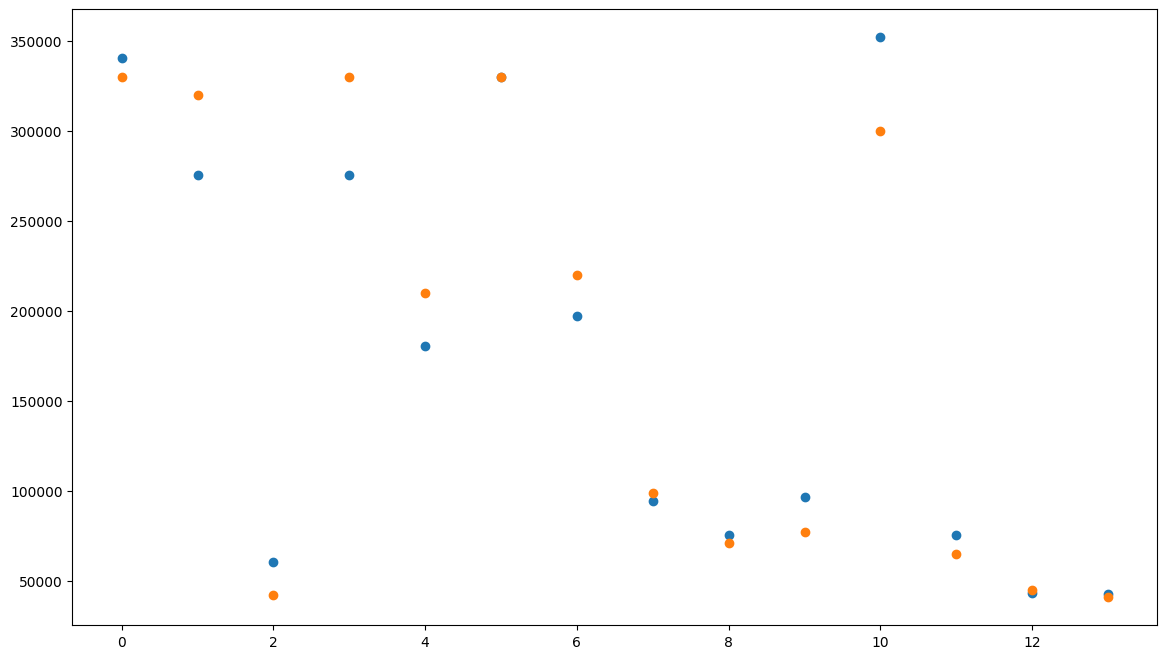

In [53]:
#Для визуализации
x = np.arange(0, len(y_pred_XGB))
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x, y_pred_XGB)
ax.scatter(x, y_test)

# Предобработка данных

# Блок аналитики

### Визуализация

In [ ]:
Coord = []
Value = []
for score in Q:
    Coord.append(score[0])
    Value.append(score[1])

print('График')
plt.plot(Coord, Value, 'o', color='black', markersize=2)
plt.xlabel("x")
plt.ylabel("y")


df = pd.DataFrame(Q, columns =['Колонка 1', 'Колонка 2'])
df

### Выгрузка массива решений в формате excel

In [ ]:
#Для удобства переведем массив решений в формат листа [x, y, p]
ListSolution = [] #с 0 счет идет
a = mesh
xa, ya = a.cellCenters
k = 0
for j in range(0, len(np.unique(xa))):
    for i in range(0, len(np.unique(ya))):
        ListSolution.append([xa[k], ya[k], phi.value[k]])
        k = k + 1

#Выгрузка решения в excel
filteredCoord = []
filteredValue = []
forPrint = []
for score in ListSolution:
    filteredCoord.append(score[1])
    filteredValue.append(score[2])
    forPrint.append([score[0], score[1], score[2]])

df = pd.DataFrame(forPrint, columns =['x (м)', 'y (м)', 'Давление (Па)'])
display(df)

#сохранение массива
df.to_excel("output_all.xlsx")


# Выводы